In [1]:
##########2016 Pitching Analysis##########

In [2]:
#Import libraries
from bs4 import BeautifulSoup
import requests

import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import csv

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
#Change display settings for viewing data
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 400)

In [4]:
##########Scrape 2016 PitchingGame Logs from Baseball Reference##########

In [5]:
#Use requests library to get the URL that we'll use to construct game IDs
r = requests.get("http://www.baseball-reference.com/teams/opening.shtml")
data = r.text

In [6]:
#Create beautiful soup object from the data
soup = BeautifulSoup(data)

In [7]:
#Put all the links in a list
results = []

for link in soup.find_all('a'):
    results.append(link.get('href'))

In [8]:
#Select the relevant links
results = results[50:80]

In [9]:
#We have one issue: FLA should say MIA; let's see if we can fix this
#Delete the FLA list element
del results[1]

In [10]:
#Append the correct version
results.append('/teams/MIA/opening.shtml')

In [11]:
#Extract the Team ID from each link
results1 = []

for i in results:
    results1.append(i[7:10])

In [12]:
#Concantenate strings to create URLs
results2 = list(map('http://www.baseball-reference.com/teams/tgl.cgi?team={0}&t=p&year=2016'.format, results1))

In [13]:
#Scrape each link
results3 = []

for i in results2:
    results3.append(requests.get(i))

In [14]:
#Grab the text for each link
results4 = []

for i in results3:
    results4.append(i.text)

In [15]:
#Make each a beautiful soup object
results5 = []

for i in results4:
    results5.append(BeautifulSoup(i))

In [16]:
#Extract the tabular data from each link
results6 = []

for i in results5:
    results6.append(i.findAll('tr'))

results7 = []

for j in results6:
    results7.append([[td.getText() for td in j[i].findAll('td')]
            for i in range(len(j))])

results8 = []

for i in results7:
    results8.append(pd.DataFrame(i))

In [17]:
#Rename columns
for i in results8:
    i.rename(columns={0: 'Rk', 1: "Gtm", 2: "Date", 3: 'Location', 4: 'Opp', 5: 'Rslt', 6: 'IP', 7: 'H',
                                    8: 'R', 9: 'ER', 10: 'UER', 11: 'BB', 12: 'SO', 13: 'HR', 14: 'HBP', 15: 'ERA', 16: 'BF', 17: 'Pit',
                                     18: 'Str', 19: 'IR', 20: 'IS', 21: 'SB', 22: 'CS', 23: 'AB', 24: '2B', 25: '3B', 
                                     26: 'IBB', 27: 'SH', 28: 'SF', 29: 'ROE', 30: 'GDP', 31: '#', 32: 'Umpire', 
                                     33: 'Pitchers Used'}, inplace=True)

In [18]:
#Combine the list of dataframes into one big dataframe
df = pd.concat(results8)

In [19]:
#Look at summary statistics - it seems most everything is being read as a string
df.describe()

,Rk,Gtm,Date,Location,Opp,Rslt,IP,H,R,ER,UER,BB,SO,HR,HBP,ERA,BF,Pit,Str,IR,IS,SB,CS,AB,2B,3B,IBB,SH,SF,ROE,GDP,#,Umpire,Pitchers Used
count,4566,4566,4566,4560,4560,4560,4560,4560,4560,4560,4560,4560,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532
unique,187,163,222,16,46,248,43,23,22,19,11,42,23,8,5,404,47,170,110,13,8,7,4,45,10,5,4,4,5,5,6,11,88,4532
top,34,8,Apr 16,@,WSN,"W,3-2",9.0,7,3,2,0,3,7,1,0,4.00,36,141,89,0,0,0,0,33,1,0,0,0,0,0,0,4,,"T.Bauer (4-64-W), A.Miller (3)"
freq,28,34,28,2266,162,144,3067,520,649,680,3567,919,609,1605,3253,50,422,97,165,1784,3301,2964,3697,527,1385,3790,3792,3663,3538,3247,2048,1466,94,1


In [20]:
#Drop the NA values
df = df.dropna()

In [21]:
#Select the numeric columns
df_num = df[["IP", "H", "R", "ER", "UER", "BB", "SO", "HR", "HBP", "ERA", "BF", "Pit", "Str", "IR", "IS", "SB", "CS",
            "AB", "2B", "3B", "IBB", "SH", "SF", "ROE", "GDP", "Gtm"]]

In [22]:
#Tell Python to treat these data as numeric
df_num = df_num.convert_objects(convert_numeric=True)

In [23]:
#Select the categorical data we want
df_cat = df[["Date", "Location", "Rslt", "Opp"]]

In [24]:
#Concatenate the previous two dataframes
df_final = pd.concat([df_num, df_cat], axis=1, join_axes=[df_num.index])

In [25]:
#Add a column to more clearly identify the month
df_final['Apr'] = df_final.Date.str.startswith('Apr')
df_final['May'] = df_final.Date.str.startswith('May')
df_final['Jun'] = df_final.Date.str.startswith('Jun')
df_final['Jul'] = df_final.Date.str.startswith('Jul')
df_final['Aug'] = df_final.Date.str.startswith('Aug')
df_final['Sep'] = df_final.Date.str.startswith('Sep')
df_final['Oct'] = df_final.Date.str.startswith('Oct')

def label_month (row):
   if row['Apr'] == True :
      return 'Apr'
   if row['May'] == True :
      return 'May'
   if row['Jun'] == True:
      return 'Jun'
   if row['Jul'] == True:
      return 'Jul'
   if row['Aug'] == True:
      return 'Aug'
   if row['Sep'] == True:
      return 'Sep'
   if row['Oct'] == True:
      return 'Oct'
    
df_final['Month'] = df_final.apply (lambda row: label_month (row), axis=1)

In [26]:
#Clean up the labels for home vs away
def label_location (row):
   if row['Location'] == "@" :
      return 'Away'
   else:
    return 'Home'
df_final['Location'] = df.apply (lambda row: label_location (row), axis=1)

In [27]:
#Grab the L or the W from the Rslt column
df_final['Result'] = df_final['Rslt'].str[:1]

C:\Users\Micah\AppData\Local\Dato\Dato Launcher\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


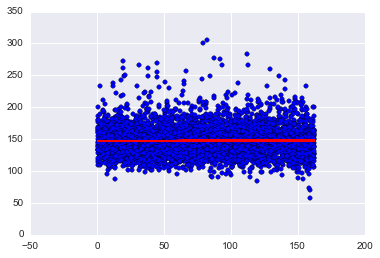

In [28]:
#Time series - Do the number of pitches increase over time?
fig, ax = plt.subplots()
fit = np.polyfit(df_final['Gtm'], df_final['Pit'], deg=1)
ax.plot(df_final['Gtm'], fit[0] * df_final['Gtm'] + fit[1], color='red')
ax.scatter(df_final['Gtm'], df_final['Pit'])

fig.show()

#I tried other variables but all the regression lines are flat

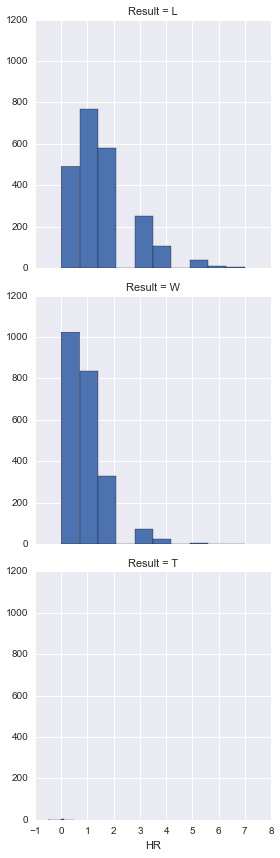

In [29]:
#Home runs by win or loss
g = sns.FacetGrid(df_final, "Result", size = 4)
g = g.map(plt.hist, "HR")

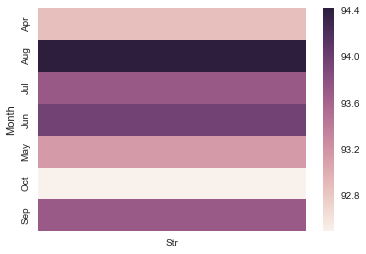

In [30]:
#Average number of pitches per month
df_month = df_final[['Str', 'Month']]
df_month = pd.pivot_table(df_month,index=["Month"], aggfunc=np.mean)
sns.heatmap(df_month)

In [31]:
#Print the amounts
print(df_month)

             Str
Month           
Apr    92.872920
Aug    94.428571
Jul    93.720113
Jun    93.969697
May    93.158890
Oct    92.500000
Sep    93.706965


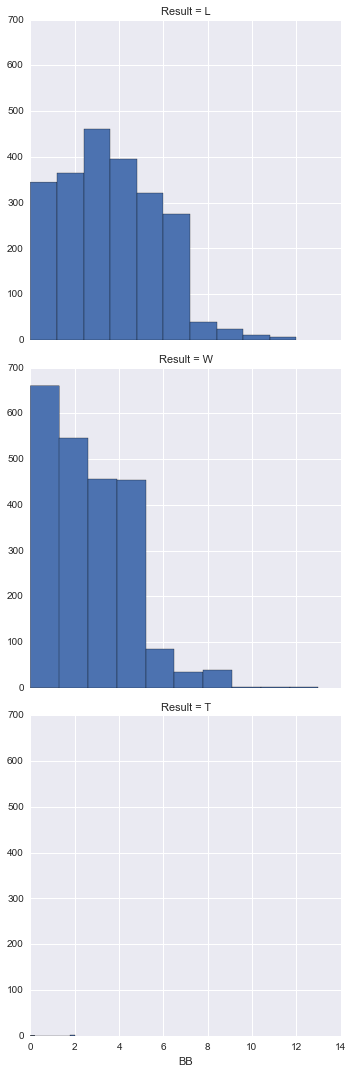

In [32]:
#Walks by win or loss
g = sns.FacetGrid(df_final, "Result", size = 5)
g = g.map(plt.hist, "BB")

In [33]:
#Home vs. Away descriptive statistics 
home_vs_away = df_final.groupby('Location')
home_vs_away.describe()

2B           3B           AB        Apr        Aug  \
Location                                                                      
Away     count  2266.000000  2266.000000  2266.000000       2266       2266   
         mean      1.692410     0.199470    33.308032  0.1473963  0.1751986   
         std       1.379223     0.469766     4.228725  0.3545788  0.3802208   
         min       0.000000     0.000000    16.000000      False      False   
         25%       1.000000     0.000000    31.000000          0          0   
         50%       1.000000     0.000000    33.000000          0          0   
         75%       2.750000     0.000000    35.000000          0          0   
         max       9.000000     4.000000    65.000000       True       True   
Home     count  2266.000000  2266.000000  2266.000000       2266       2266   
         mean      1.725949     0.172992    34.917034  0.1443071  0.1738747   
         std       1.380535     0.432758     4.400502  0.3514785  0.3790853   
         min       0.000000     0.000000    18.000000      False      False   
         25%       1.000000     0.000000    32.000000          0          0   
         50%       2.000000     0.000000    34.000000          0          0   
         75%       3.000000     0.000000    37.000000          0          0   
         max       9.000000     4.000000    72.000000       True       True   

                         BB           BF           CS           ER  \
Location                                                             
Away     count  2266.000000  2266.000000  2266.000000  2266.000000   
         mean      3.182259    37.293027     0.195057     4.191968   
         std       1.988458     5.075650     0.438634     2.993702   
         min       0.000000    19.000000     0.000000     0.000000   
         25%       2.000000    34.000000     0.000000     2.000000   
         50%       3.000000    37.000000     0.000000     4.000000   
         75%       4.000000    40.000000     0.000000     6.000000   
         max      13.000000    75.000000     3.000000    17.000000   
Home     count  2266.000000  2266.000000  2266.000000  2266.000000   
         mean      3.039718    38.781112     0.212268     4.097087   
         std       2.002033     5.390099     0.462691     2.944868   
         min       0.000000    20.000000     0.000000     0.000000   
         25%       2.000000    35.000000     0.000000     2.000000   
         50%       3.000000    38.000000     0.000000     4.000000   
         75%       4.000000    42.000000     0.000000     6.000000   
         max      11.000000    76.000000     3.000000    18.000000   

                        ERA          GDP          Gtm            H  \
Location                                                             
Away     count  2266.000000  2266.000000  2266.000000  2266.000000   
         mean      4.116606     0.741836    81.338482     8.587820   
         std       0.745375     0.854536    46.784563     3.446790   
         min       0.000000     0.000000     1.000000     0.000000   
         25%       3.730000     0.000000    41.000000     6.000000   
         50%       4.130000     1.000000    81.000000     8.000000   
         75%       4.500000     1.000000   122.000000    11.000000   
         max       9.530000     5.000000   162.000000    22.000000   
Home     count  2266.000000  2266.000000  2266.000000  2266.000000   
         mean      4.127207     0.797440    81.519417     8.800088   
         std       0.777821     0.855065    46.683622     3.538651   
         min       1.000000     0.000000     1.000000     1.000000   
         25%       3.740000     0.000000    41.000000     6.000000   
         50%       4.120000     1.000000    82.000000     8.000000   
         75%       4.500000     1.000000   122.000000    11.000000   
         max      14.000000     5.000000   162.000000    22.000000   

                        HBP           HR          IBB           IP  \
Location  

In [34]:
#Descriptive statistics by opponent
opp = df_final.groupby('Opp')
opp.describe()

2B          3B          AB        Apr        Aug  \
Opp                                                                   
ARI count  159.000000  159.000000  159.000000        159        159   
    mean     1.773585    0.352201   35.012579   0.163522  0.1761006   
    std      1.479499    0.575209    4.653823  0.3710098  0.3821093   
    min      0.000000    0.000000   23.000000      False      False   
    25%      1.000000    0.000000   32.000000          0          0   
    50%      2.000000    0.000000   34.000000          0          0   
    75%      2.500000    1.000000   38.000000          0          0   
    max      7.000000    3.000000   52.000000       True       True   
ATL count  161.000000  161.000000  161.000000        161        161   
    mean     1.832298    0.167702   34.248447  0.1428571   0.173913   
    std      1.370383    0.421842    4.127698  0.3510189  0.3802173   
    min      0.000000    0.000000   27.000000      False      False   
    25%      1.000000    0.000000   32.000000          0          0   
    50%      2.000000    0.000000   34.000000          0          0   
    75%      3.000000    0.000000   36.000000          0          0   
    max      6.000000    2.000000   55.000000       True       True   
BAL count  137.000000  137.000000  137.000000        137        137   
    mean     1.656934    0.043796   34.153285  0.1313869  0.2116788   
    std      1.274397    0.205391    4.050945  0.3390627  0.4099974   
    min      0.000000    0.000000   23.000000      False      False   
    25%      1.000000    0.000000   31.000000          0          0   
    50%      1.000000    0.000000   34.000000          0          0   
    75%      2.000000    0.000000   37.000000          0          0   
    max      6.000000    1.000000   53.000000       True       True   
BOS count  136.000000  136.000000  136.000000        136        136   
    mean     2.125000    0.183824   35.183824  0.1544118  0.1691176   
    std      1.727501    0.442254    3.763769  0.3626788  0.3762416   
    min      0.000000    0.000000   29.000000      False      False   
    25%      1.000000    0.000000   32.000000          0          0   
    50%      2.000000    0.000000   35.000000          0          0   
    75%      3.000000    0.000000   37.000000          0          0   
    max      9.000000    2.000000   49.000000       True       True   
CHC count  158.000000  158.000000  158.000000        158        158   
    mean     1.797468    0.189873   33.974684  0.1265823   0.164557   
    std      1.265714    0.439338    4.922261  0.3335617  0.3719592   
    min      0.000000    0.000000   18.000000      False      False   
    25%      1.000000    0.000000   31.000000          0          0   
    50%      2.000000    0.000000   33.000000          0          0   
    75%      3.000000    0.000000   36.750000          0          0   
    max      5.000000    2.000000   54.000000       True       True   
CHW count  148.000000  148.000000  148.000000        148        148   
    mean     1.709459    0.202703   34.500000  0.1216216  0.1824324   
    std      1.284409    0.480355    4.667881  0.3279581  0.3875119   
    min      0.000000    0.000000   24.000000      False      False   
    25%      1.000000    0.000000   32.000000          0          0   
    50%      2.000000    0.000000   34.000000          0          0   
    75%      3.000000    0.000000   37.000000          0          0   
    max      6.000000    2.000000   53.000000       True       True   
CIN count  159.000000  159.000000  159.000000        159        159   
    mean     1.716981    0.207547   33.880503  0.1509434  0.1572327   
    std      1.419271    0.464914    4.278833  0.3591248  0.3651702   
    min      0.000000    0.000000   25.000000      False      False   
    25%      1.000000    0.000000   31.000000          0          0   
    50%      1.000000    0.000000   33.000000          0          0   
    75%      2.500000    0.000000   36.0000

In [35]:
#Create a pivot table based on the Opponent
opp_pivot = pd.pivot_table(df_final,index=["Opp"], aggfunc=np.sum)
opp_pivot = pd.DataFrame(opp_pivot)
print(opp_pivot)

      2B  3B    AB  Apr  Aug   BB    BF  CS   ER     ERA  GDP    Gtm     H  \
Opp                                                                          
ARI  282  56  5567   26   28  451  6148  31  670  662.71  114  12878  1454   
ATL  295  27  5514   23   28  502  6192  34  590  640.51  146  13038  1404   
BAL  227   6  4679   18   29  410  5170  11  590  554.68   97  11317  1182   
BOS  289  25  4785   21   23  459  5324  16  700  571.96  120  10722  1358   
CHC  284  30  5368   20   26  646  6189  33  732  681.10  106  13132  1374   
CHW  253  30  5106   18   27  426  5650  32  608  609.11  114  12163  1332   
CIN  273  33  5387   24   25  450  5991  50  663  639.20  127  12792  1380   
CLE  277  29  5035   18   26  501  5666  28  634  613.33  133  12391  1298   
COL  314  47  5518   23   28  484  6127  38  770  670.83  111  13033  1520   
DET  233  29  5088   23   25  450  5637  22  648  604.52  124  12083  1362   
HOU  256  24  4713   24   26  462  5258  38  558  558.21  104  1

In [36]:
#Write the file to CSV as we can look at the data in Excel and apply conditional formatting
opp_pivot.to_csv('opponent_stats.csv', index=True, header=True)

In [37]:
#Read the file back in
opp = pd.read_csv('opponent_stats.csv')

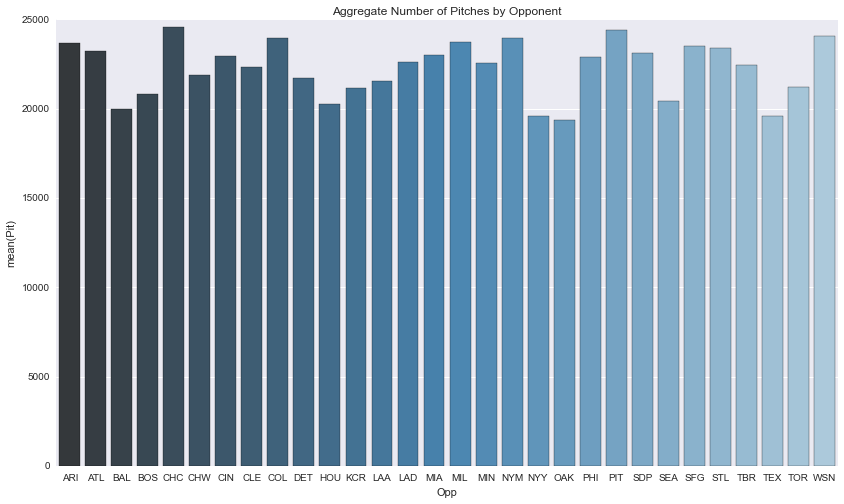

In [38]:
#Bar chart for numbers of pitches by opponent. Which team causes pitchers to throw the most pitches?
plt.figure(figsize=(14, 8))
sns.barplot("Opp", y="Pit", data=opp, palette="Blues_d")
sns.plt.title('Aggregate Number of Pitches by Opponent')

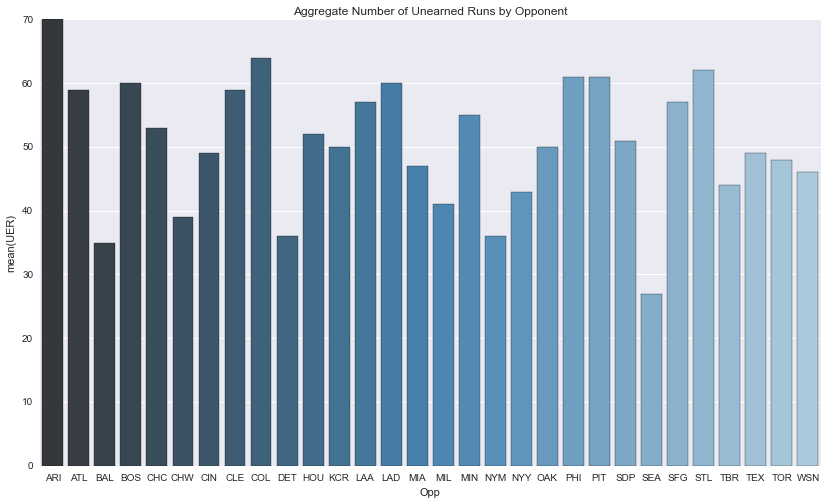

In [39]:
#Bar chart for number of unearned runs by opponent
plt.figure(figsize=(14, 8))
sns.barplot("Opp", y="UER", data=opp, palette="Blues_d")
sns.plt.title('Aggregate Number of Unearned Runs by Opponent')

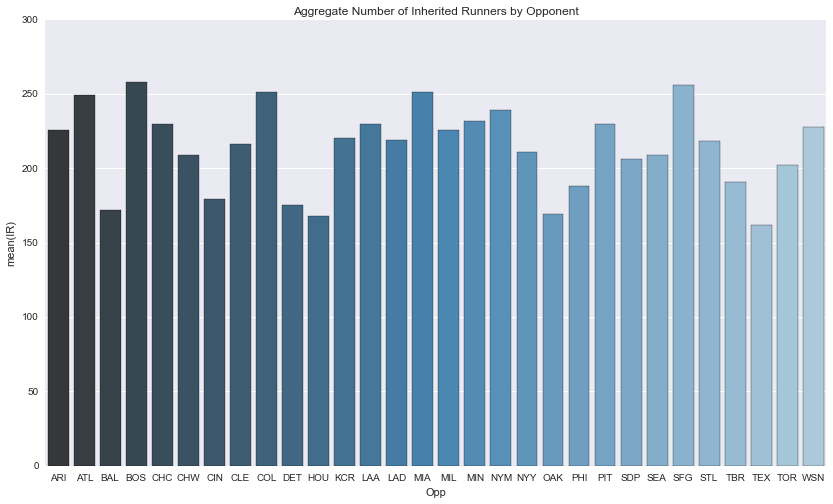

In [40]:
#Bar chart for numbers of inherited runners by opponent
plt.figure(figsize=(14, 8))
sns.barplot("Opp", y="IR", data=opp, palette="Blues_d")
sns.plt.title('Aggregate Number of Inherited Runners by Opponent')

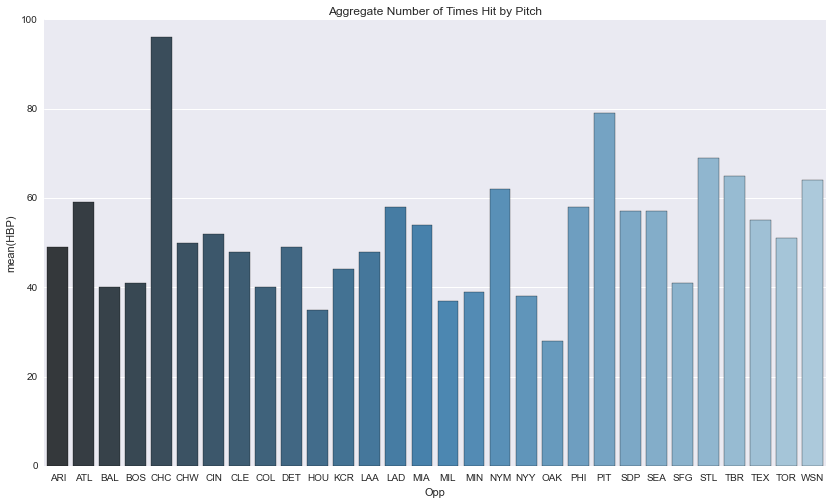

In [41]:
#Bar chart for numbers of times hit by pitch
plt.figure(figsize=(14, 8))
sns.barplot("Opp", y="HBP", data=opp, palette="Blues_d")
sns.plt.title('Aggregate Number of Times Hit by Pitch')

In [42]:
#Principle component analysis
from sklearn.decomposition import PCA

df_pca = df[["IP", "H", "R", "ER", "UER", "BB", "SO", "HR", "HBP", "ERA", "BF", "Pit", "Str", "IR", "IS", "SB", "CS",
            "AB", "2B", "3B", "IBB", "SH", "SF", "ROE", "GDP"]]

df_pca = df_num.dropna()
pca = PCA().fit(df_pca)

print 'Explained variance by component: %s' % pca.explained_variance_ratio_
print pd.DataFrame(pca.components_)

Explained variance by component: [  7.19385519e-01   2.53127845e-01   9.25005925e-03   8.76407324e-03
   2.69847795e-03   1.99654735e-03   9.32662908e-04   8.40880663e-04
   6.08204392e-04   4.60668372e-04   3.60924671e-04   2.54782127e-04
   2.23454335e-04   2.04591029e-04   1.77022522e-04   1.71636256e-04
   1.08674975e-04   9.48859289e-05   7.16673130e-05   7.11045679e-05
   6.81219919e-05   6.09320555e-05   5.84329235e-05   8.39007588e-06
   4.41038777e-07   5.55399751e-33]
          0             1         2         3         4             5   \
0  -0.000281  1.085460e-03  0.001608  0.001026  0.000581 -1.436784e-04   
1   0.016830  6.773429e-02  0.051346  0.046854  0.004492  3.777474e-02   
2  -0.055599  4.408724e-01  0.450463  0.426030  0.024433  7.227636e-02   
3   0.035507  2.361255e-01  0.064630  0.060214  0.004416 -2.299009e-01   
4  -0.182184  4.906235e-02  0.407576  0.409029 -0.001452 -9.881170e-03   
5   0.013634 -1.581004e-02  0.149698  0.167166 -0.017467  2.115295e-02   

In [43]:
######################################################################################################